<a href="https://colab.research.google.com/github/hectormorag/BeeTaskConf/blob/main/Example_Video_Tracking_with_Beesbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [ ]:
!pip install --force-reinstall numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.


In [ ]:
# Install github repos, and ensure ffmpeg is available
!pip install git+https://github.com/BioroboticsLab/bb_binary
!pip install git+https://github.com/BioroboticsLab/bb_pipeline
!pip install git+https://github.com/BioroboticsLab/bb_tracking
!pip install git+https://github.com/BioroboticsLab/bb_behavior
!pip install git+https://github.com/BioroboticsLab/bb_utils
!pip install ffmpeg

  Cloning https://github.com/BioroboticsLab/bb_binary to /tmp/pip-req-build-_a7yj71_
  Running command git clone --filter=blob:none --quiet https://github.com/BioroboticsLab/bb_binary /tmp/pip-req-build-_a7yj71_
  Resolved https://github.com/BioroboticsLab/bb_binary to commit 86891de04e7e227916e947892a88a435d3718d04
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 6.7 MB/s eta 0:00:00
  Created wh

  Cloning https://github.com/BioroboticsLab/bb_behavior to /tmp/pip-req-build-yakoo01z
  Running command git clone --filter=blob:none --quiet https://github.com/BioroboticsLab/bb_behavior /tmp/pip-req-build-yakoo01z
  Resolved https://github.com/BioroboticsLab/bb_behavior to commit bcf7bbeae61fc2de0173e740767e204ec997d4a5
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for bb_behavior: filename=bb_behavior-0.2-py3-none-any.whl size=117598 sha256=6ae5a6f5fb9a38a64f62b65f240e815dd42b92336bce495794397fb711905052
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_klcl0z/wheels/df/20/2d/4cb04f1e717a68df091cef7476a1e3ce1b3e9680b08484ef2e
Successfully built bb_behavior
  Cloning https://github.com/BioroboticsLab/bb_utils to /tmp/pip-req-build-o05ydt23
  Running command git clone --filter=blob:none --quiet https://github.com/BioroboticsLab/bb_utils /tmp/pip-req-build-o05ydt23
  Resolved https://github.com/B

In [ ]:
# Download the model files
import os
import requests

MODEL_DIR = "/content/" # default directory for colab

files = {
    "decoder_2019_keras3.h5": "https://github.com/BioroboticsLab/bb_pipeline_models/blob/master/models/decoder/decoder_2019_keras3.h5?raw=true",
    "localizer_2019_keras3.h5": "https://github.com/BioroboticsLab/bb_pipeline_models/blob/master/models/saliency/localizer_2019_keras3.h5?raw=true",
    "localizer_2019_attributes.json": "https://github.com/BioroboticsLab/bb_pipeline_models/blob/master/models/saliency/localizer_2019_attributes.json?raw=true",
    "detection_model_4.json": "https://github.com/BioroboticsLab/bb_pipeline_models/blob/master/models/tracking/detection_model_4.json?raw=true",
    "tracklet_model_8.json": "https://github.com/BioroboticsLab/bb_pipeline_models/blob/master/models/tracking/tracklet_model_8.json?raw=true"
}

for name, url in files.items():
    file_path = os.path.join(MODEL_DIR, name)
    if not os.path.exists(file_path):
        print(f"Downloading {name}...")
        r = requests.get(url)
        with open(file_path, "wb") as f:
            f.write(r.content)
        print(f"Saved to {file_path}")

# Imports

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime, os
import bb_behavior.io.videos
import bb_behavior.tracking.pipeline
import bb_behavior.tracking.tracking
import bb_behavior.tracking
import bb_tracking.types

1 Physical GPUs, 1 Logical GPUs


# Specifying a video (and tag size)

In addition to a filename, the pipeline also needs to know what approximate size the tags have in the images. It does not have to be 100% accurate, but should be in the right ballpark.
When in doubt, you can first measure the approximate number from the videos (here, 27 pixels per tag) and then run a loop in python around that value (e.g. here 25 - 30) to see which setting results in the highest decoder score (see below).

In [ ]:
# get example video and save to the colab workspace
dir = "/content/"
name, url = "ants_twin_cam_sample.mp4", "https://github.com/BioroboticsLab/bb_main/blob/master/video/ants_twin_cam_sample.mp4?raw=true"
file_path = os.path.join(dir, name)
if not os.path.exists(file_path):
    print(f"Downloading {name}...")
    r = requests.get(url)
    with open(file_path, "wb") as f:
        f.write(r.content)

In [ ]:
video_path = "/content/ants_twin_cam_sample.mp4"
tag_pixel_diameter = 32.0

# To make the notebook run faster, we just decode the first ten frames of the videos.
# Feel free to set it to None to process the whole video.
track_first_n_frames = 10

## Sanity check - Can we decode and display the video?

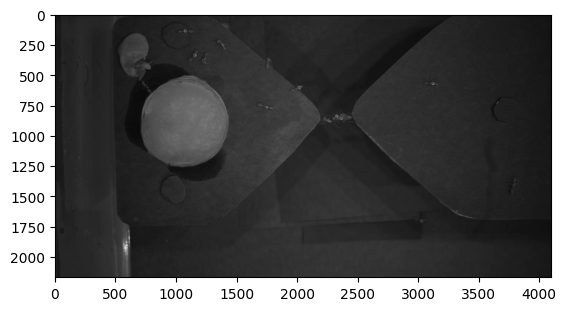

In [ ]:
first_frame_image = bb_behavior.io.videos.get_first_frame_from_video(video_path)
plt.imshow(first_frame_image)
plt.show()

# Apply decoding pipeline

The decoding pipeline is the first step that takes the videos and outputs the position, orientation etc. of the single tags for each frame.
It also generates unique frame IDs that can later be used e.g. as keys in a database.

In [ ]:
frame_info, video_dataframe = bb_behavior.tracking.detect_markers_in_video(
                video_path, verbose=False,
                # Use the default pipeline settings.
                decoder_pipeline=None,
                # Just track the first N frames to make it run faster.
                n_frames=track_first_n_frames,
                # This helper function will resize the video frames to match the ones we trained the decoder on.
                tag_pixel_diameter=tag_pixel_diameter,
                # For this test, we just auto generate timestamps. You can also pass timestamps loaded from a file here.
                timestamps=None, fps=3,
                # In case of multiple cameras / setups, you can pass unique camera IDs here.
                # For now, the camera ID will just be put in the resulting dataframe. But e.q. the tracking later will
                # track data from different cameras separately.
                cam_id=0,
                # The decoder also outputs a confidence $\in [0, 1]$ (i.e. how sure it is that the decoded ID is correct).
                # We disregard detections with very, very low confidences already in this first step.
                confidence_filter=0.001,
                # CLAHE is a histogram equalization algorithm that reduces the impact of differences in brightness in the video.
                # Just try with and without and see whether this improves the confidences.
                clahe=True,
                # Use threading and don't show progress bar.
                # Using threading can sometimes hide errors if there are problems
                # (because exceptions raised in background threads are sometimes not forwarded).
                use_parallel_jobs=False, progress=None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/pipeline.py:301: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame_data = pd.concat((frame_data, bee_data))


# Check detection results

The resulting dataframe contains information about all detections in each frame. Note that in our data we have different types of bee states where the tags are invisible (i.e. in cell, on the glass, without tag) which are also returned here.
This will not work for the ants, so we discard them.

In [ ]:
video_dataframe.head()

,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,frameId,detection_index,detection_type,confidence
0,0.973626,"[0.031613044, 0.9992441, 0.9998267, 0.9998547,...",2320.790283,844.322327,0,3.022135,0.0,0,15553252581373578142,0,TaggedBee,0.577000
2,0.966701,"[0.99861324, 0.9992046, 0.9972174, 0.08830197,...",1748.204224,769.345520,0,-0.181553,0.0,0,15553252581373578142,2,TaggedBee,0.252952
3,0.966372,"[0.9987502, 0.9996439, 0.9973061, 0.9997842, 0...",3116.539551,573.056458,0,-0.233186,0.0,0,15553252581373578142,3,TaggedBee,0.693457
4,0.963774,"[0.999967, 0.9999902, 0.99997807, 0.9998497, 0...",1152.602783,341.617676,0,-0.723759,0.0,0,15553252581373578142,4,TaggedBee,0.956691
5,0.954562,"[0.99897987, 0.032031123, 0.997813, 0.00267650...",1075.365112,143.205154,0,-3.052397,0.0,0,15553252581373578142,5,TaggedBee,0.895764


In [ ]:
# Select only tagged animals for plotting
video_dataframe = video_dataframe[video_dataframe.detection_type == "TaggedBee"]

We quickly plot all the detections on the first frame of the video to get a feeling whether it worked or not. Note that in this step there is no concept of a "track", but only separate detections.

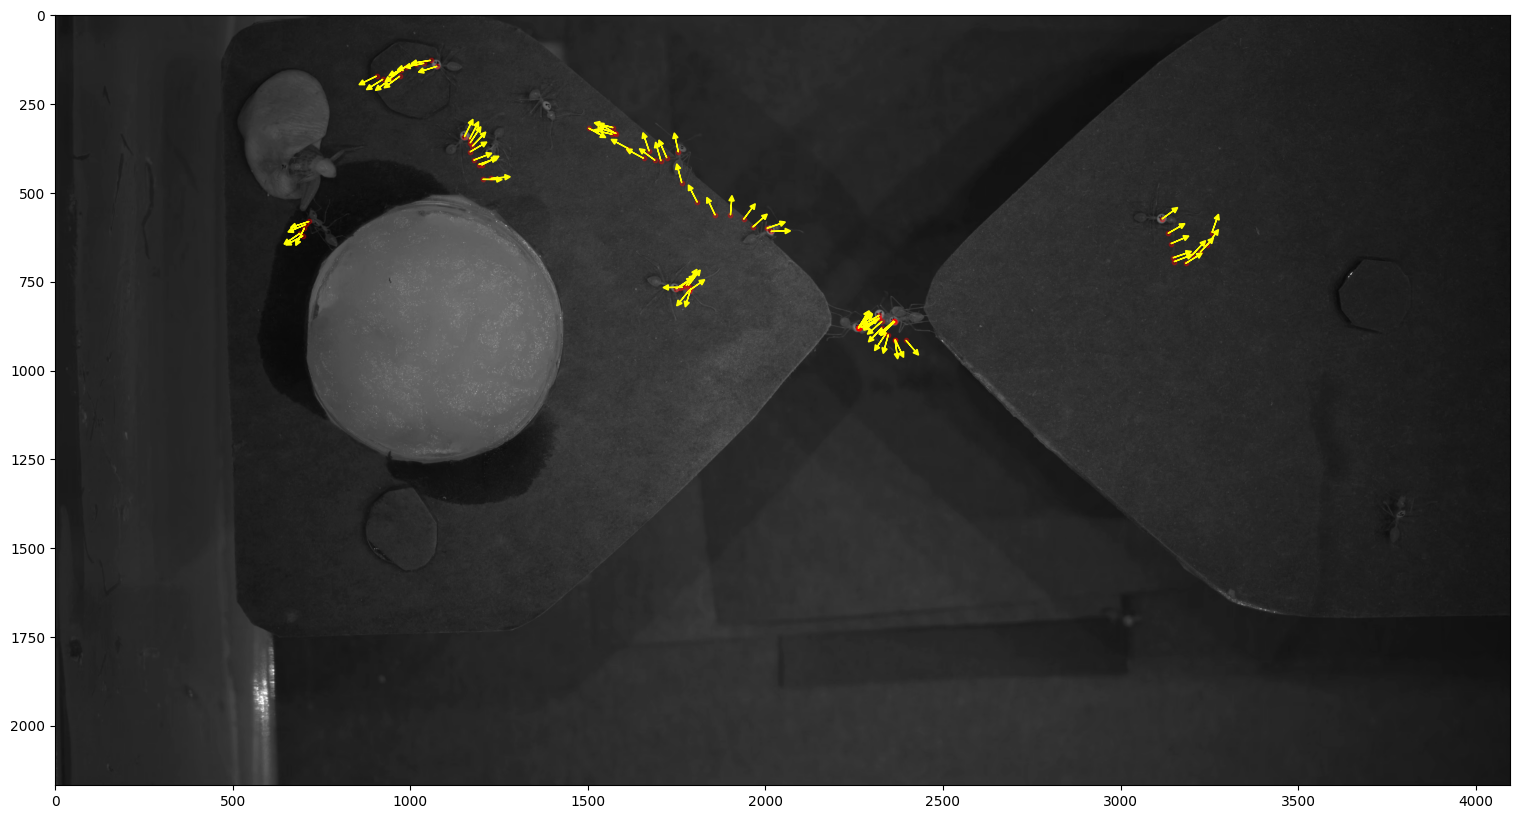

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow(first_frame_image)
# plt.scatter(video_dataframe.xpos.values, video_dataframe.ypos.values, c="yellow", alpha=0.1)
x_pixels = video_dataframe['xpos'].values
y_pixels = video_dataframe['ypos'].values
orientations = (video_dataframe['zrotation'].values - np.pi/8)
# Plot detections
plt.scatter(x_pixels, y_pixels, s=10, c='red', marker='o',alpha=0.3)
# Plot orientation arrows
for x, y, ori in zip(x_pixels, y_pixels, orientations):
    dx = 40 * np.cos(ori)  # Adjust the length as needed
    dy = 40 * np.sin(ori)
    plt.arrow(x, y, dx, dy, color='yellow', head_width=15, head_length=15)
plt.show()

Have a look at the confidences that the decoder outputs. Confidences near 1 are good. Confidences near 0 might be incorrect detections.

The tracking (the next step) also takes the confidence into account when matching detections.

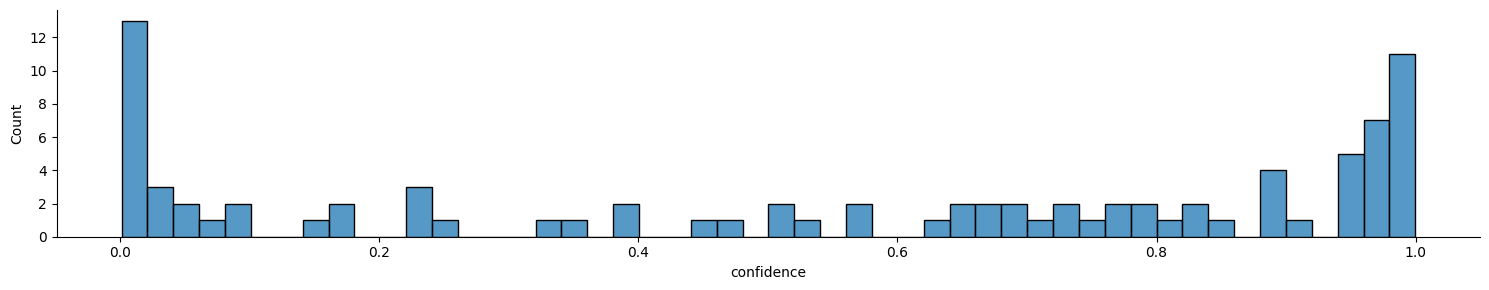

In [ ]:
sns.displot(x="confidence", data=video_dataframe, height=3, aspect=5, bins=50, log=False)
plt.show()

# Tracking the data

The data currently has no concepts of detections that belong to each other. Sure, you could use the ID. But what happens if there is a decoding error?
The tracking can correct some decoding errors, because it does not only look at the ID but also at the position and velocities etc.
Note that the tracking was trained on our bee data which might behave slightly differently (e.g. tend to walk sideways more, are slower/faster) etc..

## Homography
The tracking wants to work in mm and not in pixels. So it needs a homography that is used to convert pixels into millimeters.
A homography can also be used to correct for angled or sheared images if the camera is not 100% straight above the ground. I would suggest that for the real trials, you have some known fiducial markers in the image that you measure the position of and auto-generate a homography.

For an inspiration, see this image:
![](https://user-images.githubusercontent.com/6689731/42174824-cb92710e-7e23-11e8-845d-0f9ab1bcbc1d.png)

The `track_detections_dataframe` has a keyword argument `homography_scale` that, if given, simply scales the pixels into millimeters. I just eye-balled the values here and this would also need proper tuning.

## Tracker models
The tracking uses machine learning models, that are currently not auto-downloaded (like the pipeline models).
So you'll need to download the models I send you, put them somewhere and adjust the paths below.

In [ ]:
# get the model paths, which were downloaded during install (from bb_pipeline_models)
model_dir = '/content/'
detection_model_path = os.path.join(model_dir, 'detection_model_4.json')
tracklet_model_path = os.path.join(model_dir,'tracklet_model_8.json')

tracks_df = bb_behavior.tracking.track_detections_dataframe(
        video_dataframe,
        homography_scale=2.5 / tag_pixel_diameter * 0.5,
        cam_id=0, # Which cam ID to track.
        tracker_settings_kwargs=dict(detection_model_path=detection_model_path,
                                     tracklet_model_path=tracklet_model_path))

The dataframe now contains some new columns.
* `bee_id` is the decoded ID after the tracking (including the error correction of the tracking). Feel free to rename it to "ant_id" at some point :)
* `bee_id_confidence` is the confidence that the bee_id is correct after the tracking. Higher is better.
* `x_hive`, `y_hive`, and `orientation_hive` are the original pixel values after applying the homography and, given a correct homography, are in millimeters now.
* `track_id` is a unique ID for every new track. Detections that share a `track_id` are matched together over time, have the same `bee_id` and should belong together.

In [ ]:
tracks_df.head()

,bee_id,bee_id_confidence,track_id,x_pixels,y_pixels,orientation_pixels,x_hive,y_hive,orientation_hive,timestamp_posix,timestamp,frame_id,detection_type,detection_index,detection_confidence
0,1709,0.013012,14801014913267117675,2360.967529,861.522705,2.802070,92.225294,33.653231,2.802071,0.000000,1970-01-01 00:00:00+00:00,15553252581373578142,DetectionType.TaggedBee,10,0.895203
1,1709,0.013012,14801014913267117675,2364.635498,862.196960,2.774348,92.368574,33.679569,2.774350,3.000000,1970-01-01 00:00:03+00:00,10848568992891535346,DetectionType.TaggedBee,6,0.666198
2,355,0.979728,11522462819271709820,2015.841187,607.908508,0.368702,78.743796,23.746426,0.368702,0.000000,1970-01-01 00:00:00+00:00,15553252581373578142,DetectionType.TaggedBee,9,0.943259
3,355,0.979728,11522462819271709820,2004.279907,599.064026,0.066707,78.292184,23.400939,0.066706,0.333333,1970-01-01 00:00:00.333333+00:00,12724571826220029365,DetectionType.TaggedBee,1,0.889723
4,355,0.979728,11522462819271709820,1964.457642,595.847290,-0.336285,76.736627,23.275285,-0.336285,0.666667,1970-01-01 00:00:00.666667+00:00,17443847274668567537,DetectionType.TaggedBee,6,0.991145


`bb_behavior` also contains a helper function to do a quick plot of the tracking results. Feel free to have a look at the code and further investigate the results :)

Found 86 detections belonging to 16 unique tracks and 10 individuals.


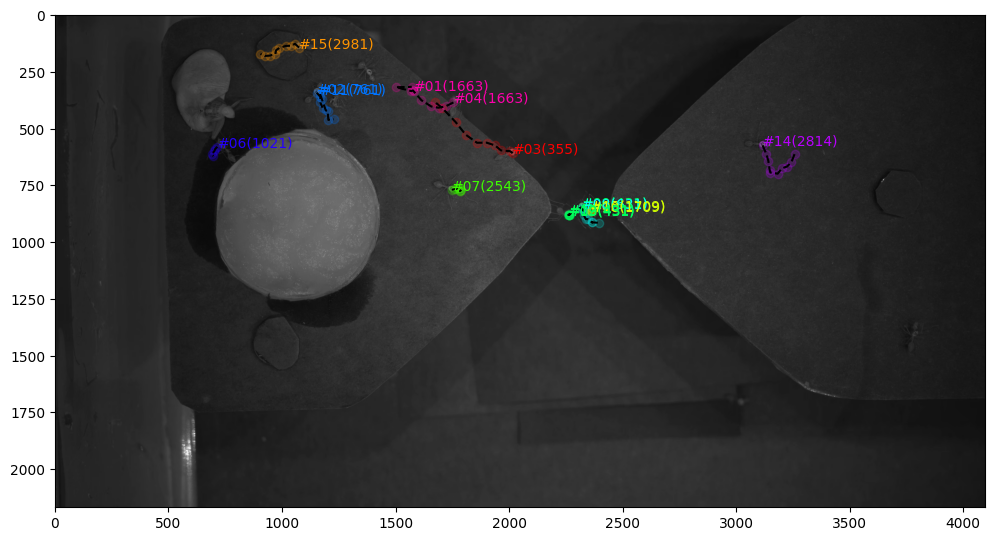

Detection/track statistics:


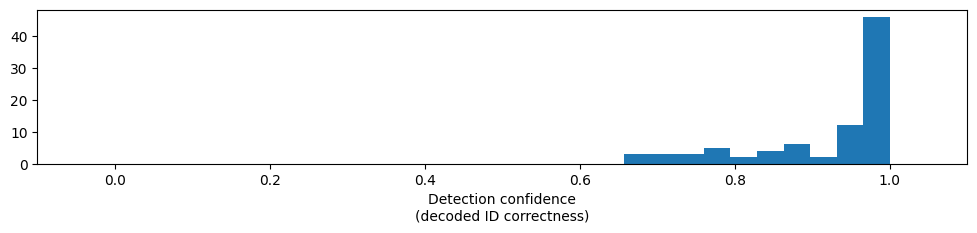

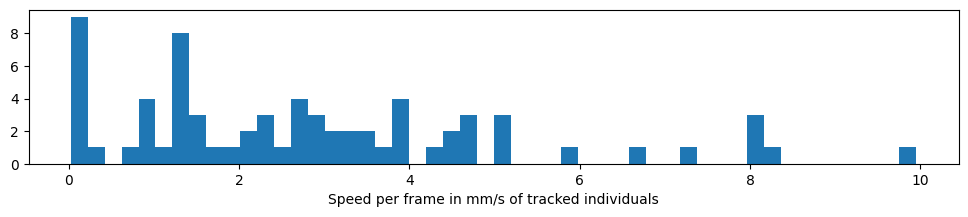

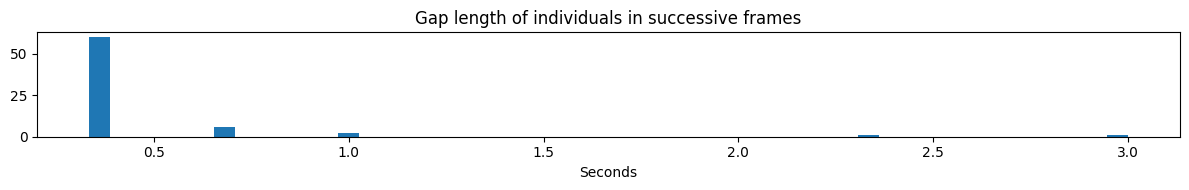

Individual statistics:


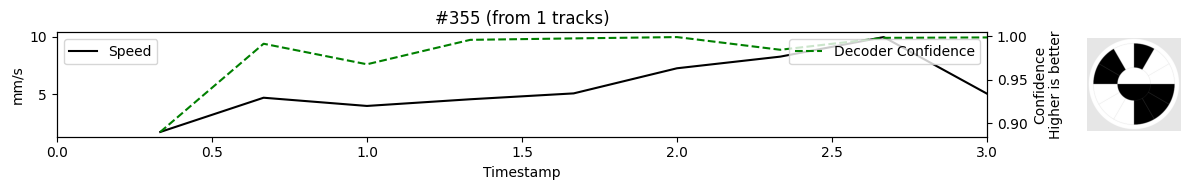

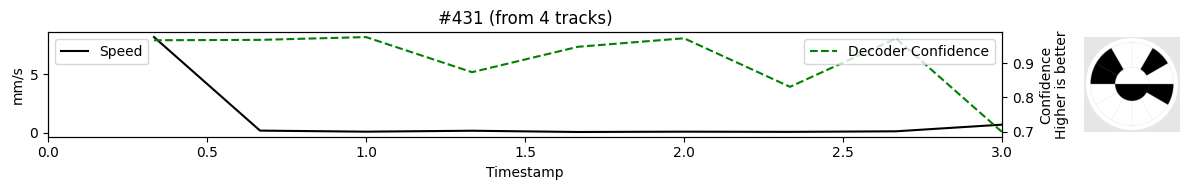

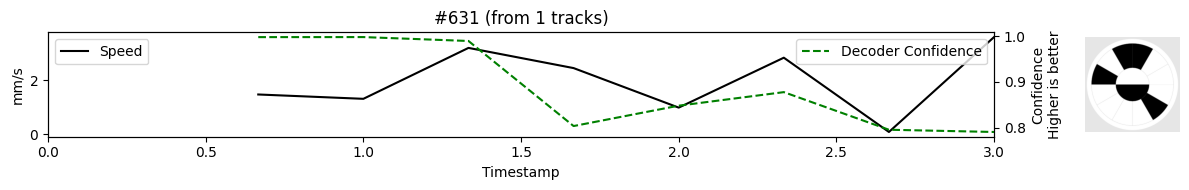

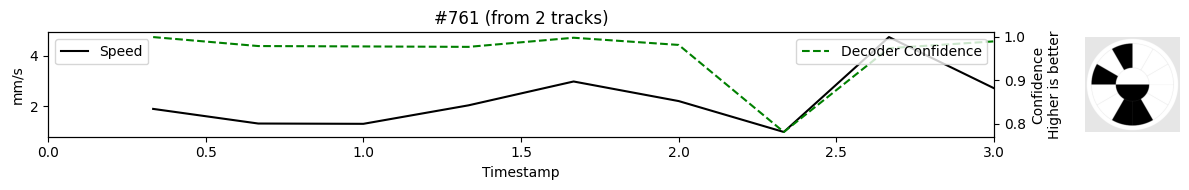

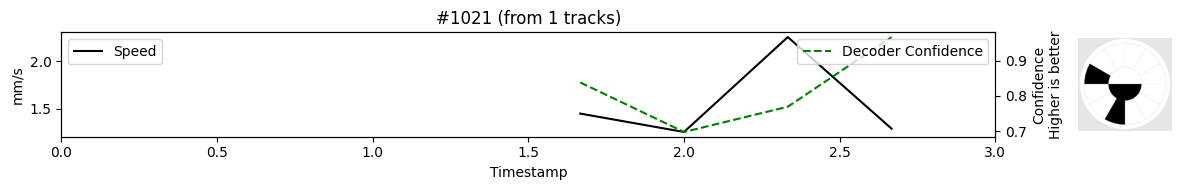

/usr/local/lib/python3.11/dist-packages/bb_behavior/tracking/tracking.py:326: RuntimeWarning: divide by zero encountered in divide
  distances /= time_differences


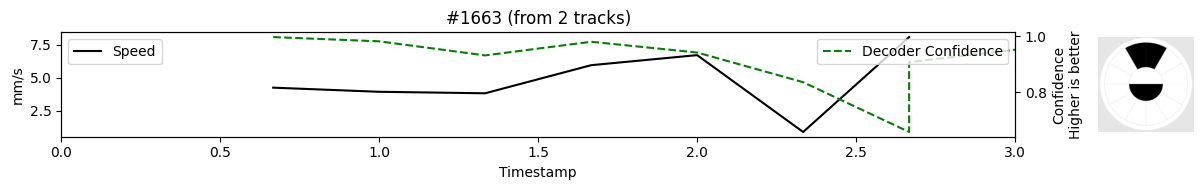

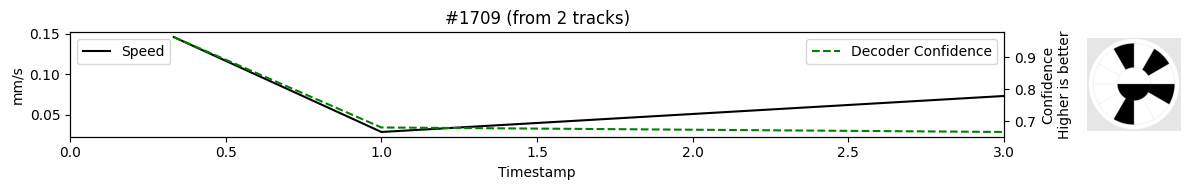

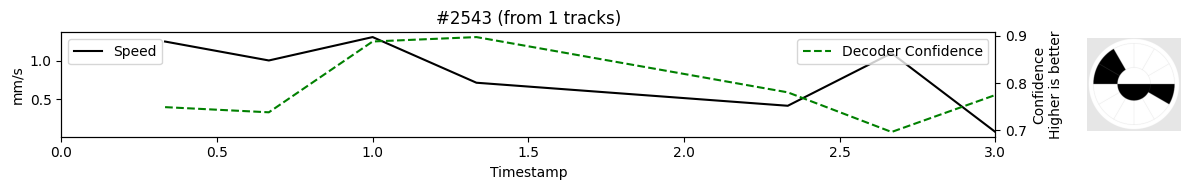

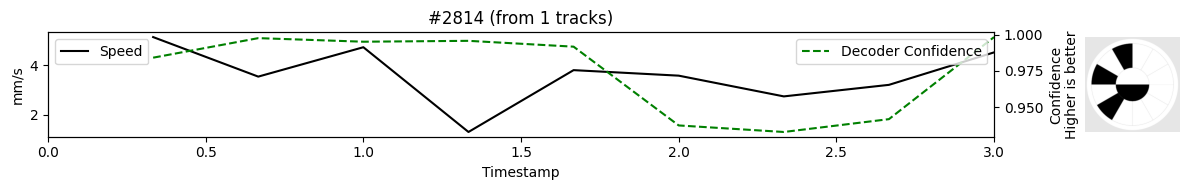

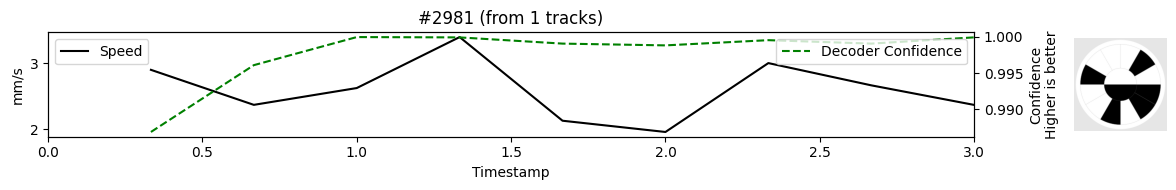

In [ ]:
bb_behavior.tracking.display_tracking_results(tracks_df, path=video_path)

# Closing words

There will always be some errorneous detections left over.

We usually further filter by the IDs we know not to be alive at a given time. If you use the set of IDs I sent you (with error correction), you could also now map the resulting IDs which you then know to be incorrect to the most probably correct ID.

For our data, we also don't use the bb_behavior wrappers to process all the videos but instead use the raw functions that e.g. don't work with pandas DataFrames but instead just a raw binary data format.
This will make the processing faster and parallel and might be necessary if you have a lot of data. It will not change the quality of the results, though. So, for convenience I'd suggest to use these wrapper functions here for the first tests.